In [1]:
import cv2 as cv 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import shutil

In [2]:
#set the training and testing path
Data_training_path = r"C:\Users\ANING\Downloads\archive\Training"
data_testing_path = r"C:\Users\ANING\Downloads\archive\Testing"
data_validation_path = r"C:\Users\ANING\Downloads\archive\validation"

In [3]:
os.listdir(Data_training_path)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [4]:
def validation_data(path,ratio,validation_path):
    # validation_path = path + '\\' +'validation'
    os.makedirs(validation_path,exist_ok=True)
    folders = os.listdir(path)
    for x in folders:
        pth = path + '\\' + x
        images = os.listdir(pth)
        num_images = len(images)
        num = int(ratio*num_images)
        os.makedirs(validation_path+'\\'+x,exist_ok=True)
        current_dir = validation_path+'\\'+x
        for i in range(num):
            image_pth = pth + '\\' + images[i]
            shutil.move(image_pth,current_dir)


In [5]:
validation_data(Data_training_path,0.4,data_validation_path)

In [6]:
#make a tensorflow image data generator to load the images
train_data_generator  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,fill_mode='nearest')
validation_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
#load the images
train_data = train_data_generator.flow_from_directory(Data_training_path,target_size=(150,150),color_mode='grayscale',class_mode='categorical')
validation_data = validation_data_generator.flow_from_directory(data_validation_path,target_size=(150,150),color_mode='grayscale',class_mode='categorical')

Found 1724 images belonging to 4 classes.
Found 1146 images belonging to 4 classes.


C:\Users\ANING\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


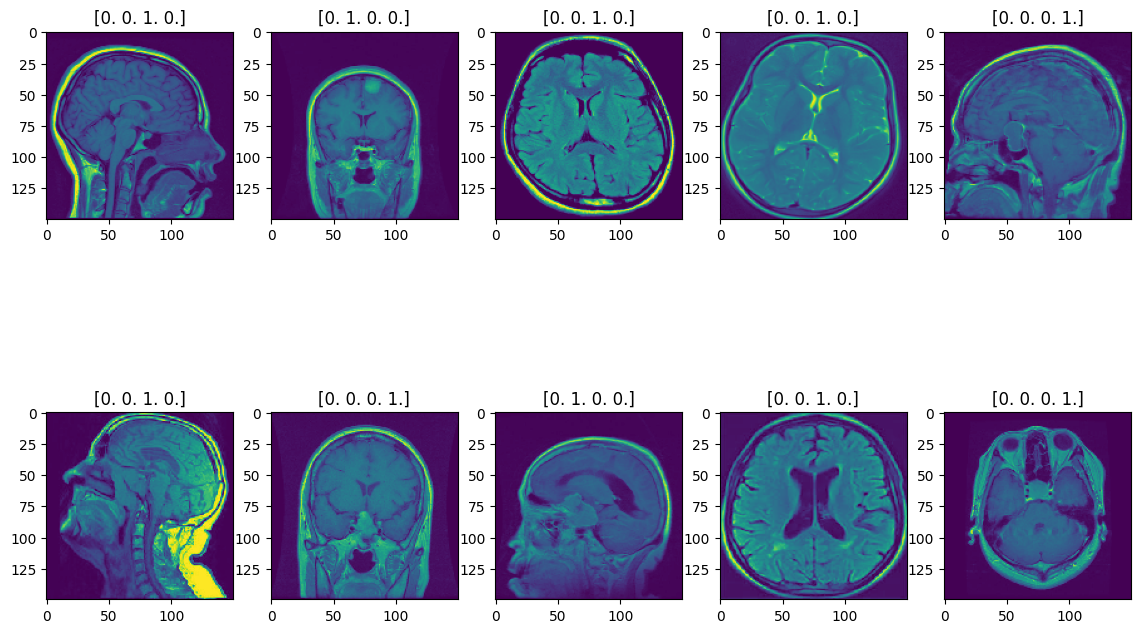

In [8]:
#plot some of the images
batch = train_data[0]
plt.figure(figsize=(14,14))
x,y = 3,5
for i in range(10):
    xmp = batch[0][i]
    labels = batch[1][i]
    plt.subplot(x,y,i+1)
    plt.imshow(xmp)
    plt.title(labels)


In [9]:
#create the CNN Model
model  = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=(150,150,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))
          

In [10]:
#compile model
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [13]:
#train model
history = model.fit(train_data,batch_size=32,epochs=10,validation_data=validation_data)

Epoch 1/10
54/54 [==============================] - 495s 9s/step - loss: 0.2749 - accuracy: 0.7784 - val_loss: 0.5825 - val_accuracy: 0.5358
Epoch 2/10
54/54 [==============================] - 447s 8s/step - loss: 0.2047 - accuracy: 0.8364 - val_loss: 0.4515 - val_accuracy: 0.6117
Epoch 3/10
54/54 [==============================] - 447s 8s/step - loss: 0.1472 - accuracy: 0.9014 - val_loss: 0.5650 - val_accuracy: 0.5785
Epoch 4/10
54/54 [==============================] - 456s 8s/step - loss: 0.0980 - accuracy: 0.9403 - val_loss: 0.7146 - val_accuracy: 0.6117
Epoch 5/10
54/54 [==============================] - 450s 8s/step - loss: 0.0622 - accuracy: 0.9617 - val_loss: 0.8756 - val_accuracy: 0.6012
Epoch 6/10
31/54 [================>.............] - ETA: 2:37 - loss: 0.0363 - accuracy: 0.9838

KeyboardInterrupt: 

In [43]:
model.save('brain_tumor_model.h5')

In [47]:
acc =history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

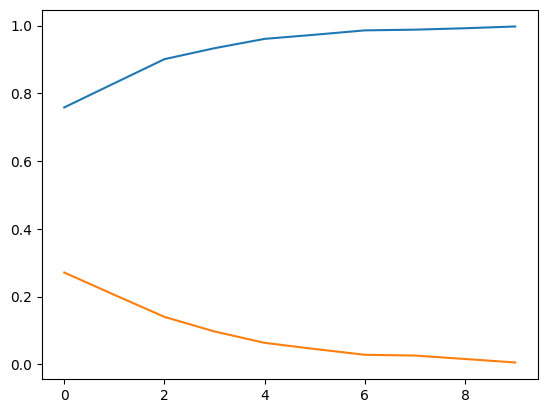

In [48]:
plt.plot(epochs,acc)
plt.plot(epochs,loss)

In [4]:
model = tf.keras.models.load_model("brain_tumor_model.h5")

1/1 [==============================] - 0s 104ms/step


1

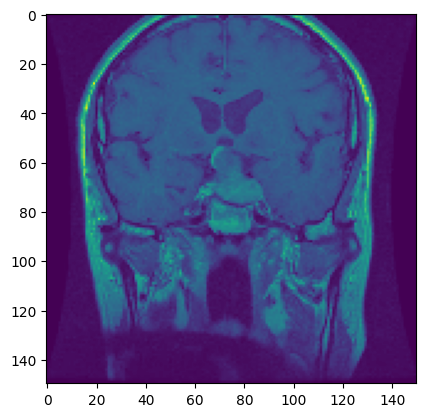

In [14]:
#run a prediction on the model
img = cv.imread(r"C:\Users\ANING\Downloads\archive\Training\pituitary_tumor\p (88).jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = cv.resize(img,(150,150))
plt.imshow(img)
img = np.expand_dims(img,-1)
img = np.expand_dims(img,0)
prediction = model.predict(img)
prediction = np.argmax(prediction)
prediction
